In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')
sns.set_context("paper", font_scale=1.5)  
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_rows', 50)

In [3]:
def adjustedR2(r2,n,k):
    return r2-(k-1)/(n-k)*(1-r2)

In [4]:
TRAIN_DATASET_PATH = 'project/train.csv'
TEST_DATASET_PATH = 'project/test.csv'

# 1. Загружаю данные

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [5]:
train_df = pd.read_csv(TRAIN_DATASET_PATH, index_col='Id')
train_df.head()

DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                   
14038          35   2.00   47.98       29.44           6.00      7   
15053          41   3.00   65.68       40.05           8.00      7   
4765           53   2.00   44.95       29.20           0.00      8   
5809           58   2.00   53.35       52.73           9.00      8   
10783          99   1.00   39.65       23.78           7.00     11   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
14038        9.00       1969       0.09         B         B        33   
15053        9.00       1978       0.00         B         B        46   
4765        12.00       1968       0.05         B         B        34   
5809        17.00       1977       0.44         B         B        23   
10783       12.00       1976       0.01         B         B        35   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  \
Id                                                                      
14038      7976         5           NaN            0       11       B   
15053     10309         1        240.00            1       16       B   
4765       7759         0        229.00            1        3       B   
5809       5735         3      1,084.00            0        5       B   
10783      5776         1      2,078.00            2        4       B   

           Price  
Id                
14038 184,966.93  
15053 300,009.45  
4765  220,925.91  
5809  175,616.23  
10783 150,226.53

In [6]:
test_df = pd.read_csv(TEST_DATASET_PATH, index_col='Id')
test_df.head()

DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
Id                                                                   
725            58   2.00   49.88       33.43           6.00      6   
15856          74   2.00   69.26         NaN           1.00      6   
5480          190   1.00   13.60       15.95          12.00      2   
15664          47   2.00   73.05       51.94           9.00     22   
14275          27   1.00   47.53       43.39           1.00     17   

       HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  \
Id                                                                      
725         14.00       1972       0.31         B         B        11   
15856        1.00       1977       0.08         B         B         6   
5480         5.00       1909       0.00         B         B        30   
15664       22.00       2007       0.10         B         B        23   
14275       17.00       2017       0.07         B         B         2   

       Social_2  Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
Id                                                                     
725        2748         1           NaN            0        0       B  
15856      1437         3           NaN            0        2       B  
5480       7538        87      4,702.00            5        5       B  
15664      4583         3           NaN            3        3       B  
14275       629         1           NaN            0        0       A

In [7]:
train_df.shape, test_df.shape

((10000, 19), (5000, 18))

# 2. Визуальный анализ данных

Воспользуюсь вариантом предложенным на уроке и собственными мыслями. Первым шагом познакомимся с данными. Построим их гистограммы, а тех, которых не много - box-plot.

In [8]:
train_df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

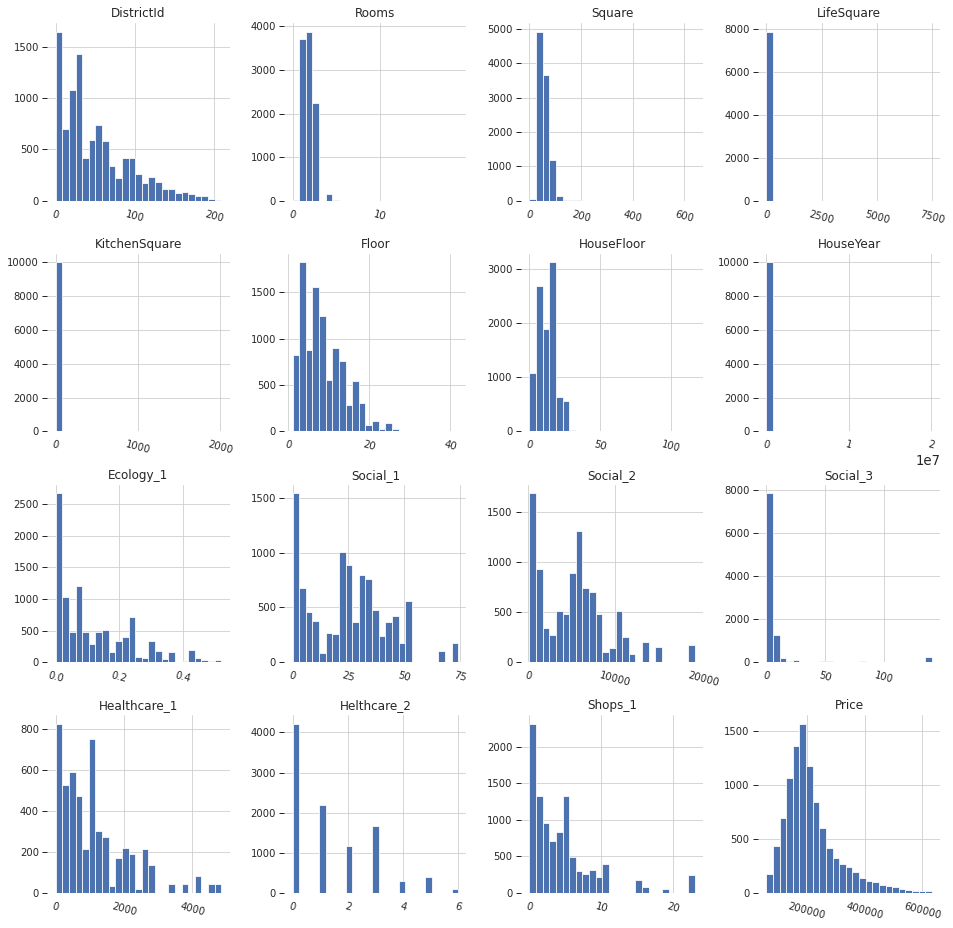

In [9]:
df1=train_df[['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

In [10]:
sns.set(style="whitegrid", font_scale=1)

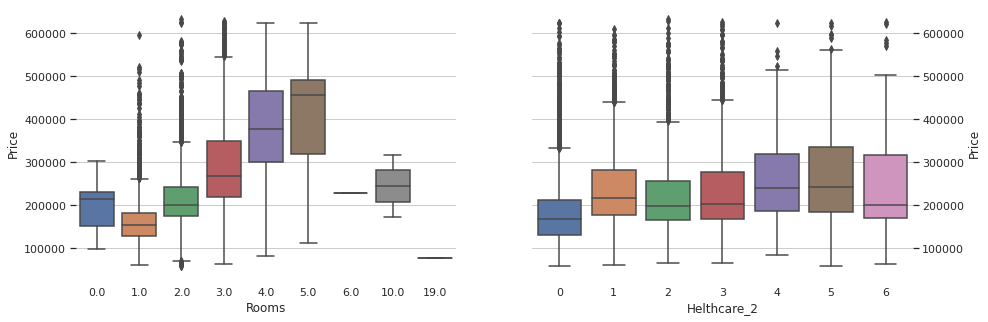

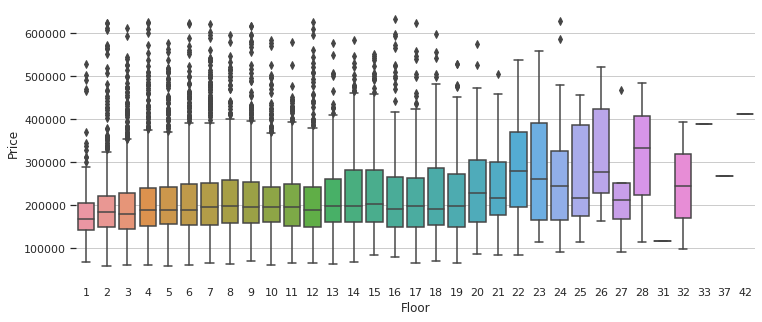

In [11]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.boxplot(x=train_df['Rooms'],y=train_df['Price'], ax=axes[0])
sns.boxplot(x=train_df['Helthcare_2'],y=train_df['Price'], ax=axes[1])
sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Rooms', ylabel='Price')
axes[0].yaxis.tick_left()
axes[1].yaxis.set_label_position("right")
axes[1].yaxis.tick_right()
axes[1].set(xlabel='Helthcare_2', ylabel='Price')

f, axe = plt.subplots(1, 1,figsize=(12.18,5))
sns.despine(left=True, bottom=True)
sns.boxplot(x=train_df['Floor'],y=train_df['Price'], ax=axe)
axe.yaxis.tick_left()
axe.set(xlabel='Floor', ylabel='Price');

Можно конечно еще долго играться с графиками, но визуально выявить влияние вряд-ли удасться. Посмотрю на корреляцию между данными.

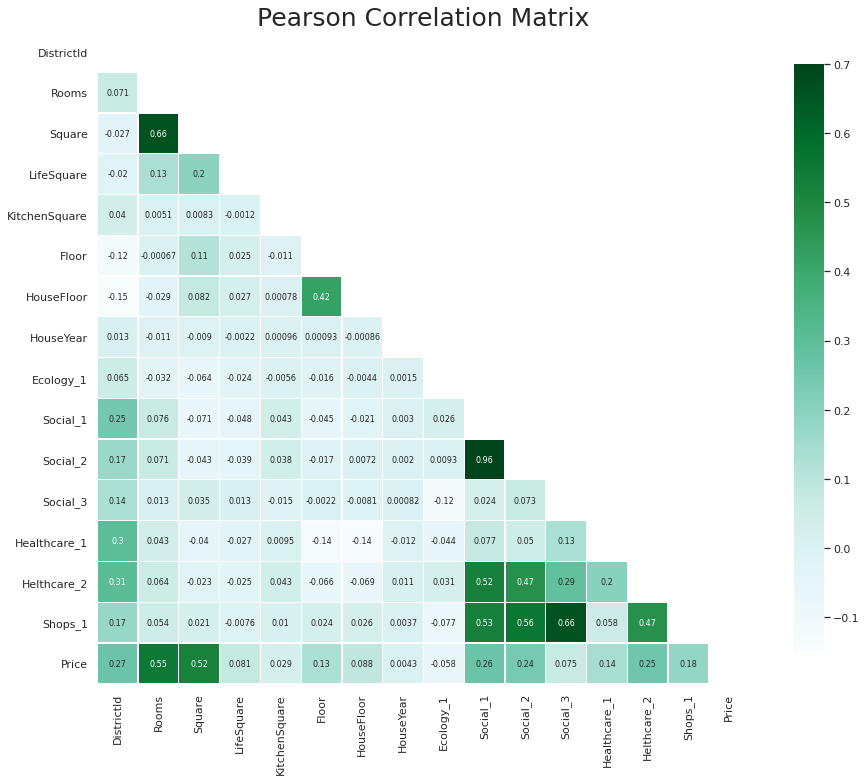

In [12]:
features = ['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price']

mask = np.zeros_like(train_df[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)


sns.heatmap(train_df[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

# 3. Подготовка данных

Для подготовки воспользуюсь примером из урока

### 3.1 Приведение типов

In [13]:
train_df.dtypes

DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [14]:
train_df['DistrictId'] = train_df['DistrictId'].astype(str)
test_df['DistrictId'] = test_df['DistrictId'].astype(str)

In [15]:
train_df.describe()

Rooms    Square  LifeSquare  KitchenSquare     Floor  HouseFloor  \
count 10,000.00 10,000.00    7,887.00      10,000.00 10,000.00   10,000.00   
mean       1.89     56.32       37.20           6.27      8.53       12.61   
std        0.84     21.06       86.24          28.56      5.24        6.78   
min        0.00      1.14        0.37           0.00      1.00        0.00   
25%        1.00     41.77       22.77           1.00      4.00        9.00   
50%        2.00     52.51       32.78           6.00      7.00       13.00   
75%        2.00     65.90       45.13           9.00     12.00       17.00   
max       19.00    641.07    7,480.59       2,014.00     42.00      117.00   

          HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
count     10,000.00  10,000.00 10,000.00 10,000.00 10,000.00      5,202.00   
mean       3,990.17       0.12     24.69  5,352.16      8.04      1,142.90   
std      200,500.26       0.12     17.53  4,006.80     23.83      1,021.52   
min        1,910.00       0.00      0.00    168.00      0.00          0.00   
25%        1,974.00       0.02      6.00  1,564.00      0.00        350.00   
50%        1,977.00       0.08     25.00  5,285.00      2.00        900.00   
75%        2,001.00       0.20     36.00  7,227.00      5.00      1,548.00   
max   20,052,011.00       0.52     74.00 19,083.00    141.00      4,849.00   

       Helthcare_2   Shops_1      Price  
count    10,000.00 10,000.00  10,000.00  
mean          1.32      4.23 214,138.86  
std           1.49      4.81  92,872.29  
min           0.00      0.00  59,174.78  
25%           0.00      1.00 153,872.63  
50%           1.00      3.00 192,269.64  
75%           2.00      6.00 249,135.46  
max           6.00     23.00 633,233.47

In [16]:
feature_num_names = train_df.drop('Price', axis=1).select_dtypes(include=['float64', 'int64']).\
        columns.tolist()
feature_num_names

['Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

In [17]:
feature_cat_names = train_df.select_dtypes(include='object').columns.tolist()
feature_cat_names

['DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [18]:
feature_bin_names = ['Ecology_2', 'Ecology_3', 'Shops_2']

train_df[feature_bin_names] = train_df[feature_bin_names].replace({'A':0, 'B':1})
test_df[feature_bin_names] = test_df[feature_bin_names].replace({'A':0, 'B':1})

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  object 
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  int64  
 18  Pri

### 3.2. Пропущенные значения

In [19]:
train_df.isna().sum()[train_df.isna().sum() != 0]

LifeSquare      2113
Healthcare_1    4798
dtype: int64

In [20]:
train_df.loc[train_df['LifeSquare'].isna(), 'LifeSquare'] = \
    train_df['Square'] - train_df['KitchenSquare']
test_df.loc[test_df['LifeSquare'].isna(), 'LifeSquare'] = \
    test_df['Square'] - test_df['KitchenSquare']

In [21]:
pd.concat([train_df.groupby('DistrictId')['Healthcare_1'].apply(lambda x: np.nanmean(x)),
          train_df.groupby('DistrictId')['Healthcare_1'].apply(lambda x: np.nanstd(x)),
          train_df.groupby('DistrictId')['Healthcare_1'].count(),
          train_df.groupby('DistrictId')['Healthcare_1'].apply(lambda x: x.isna().sum())
          ], 
          axis=1, keys=['mean', 'std', 'count', 'nans']).sort_values(by='nans', ascending=False).head(10)

mean   std  count  nans
DistrictId                            
27              NaN   NaN      0   851
1            228.77 17.97     57   595
23             0.00  0.00      1   564
62         2,300.00  0.00      9   238
45              NaN   NaN      0   116
34              NaN   NaN      0   111
61            80.00  0.00      8   110
13         1,406.00  0.00      4    93
9             30.00  0.00    202    92
48         2,620.00  0.00      1    89

In [22]:
pd.concat([train_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: np.nanmean(x)),
          train_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: np.nanstd(x)),
          train_df.groupby('Helthcare_2')['Healthcare_1'].count(),
          train_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: x.isna().sum())
          ], 
          axis=1, keys=['mean', 'std', 'count', 'nans']).sort_values(by='nans', ascending=False)

mean      std  count  nans
Helthcare_2                               
0           1,007.78   913.61   1275  2939
1             811.36   696.54    925  1258
3           1,363.38 1,005.68   1347   323
5           1,824.09 1,574.23    212   176
2           1,010.71 1,045.44   1056   102
4           1,929.23 1,121.87    288     0
6             645.00     0.00     99     0

In [23]:
pd.concat([test_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: np.nanmean(x)),
          test_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: np.nanstd(x)),
          test_df.groupby('Helthcare_2')['Healthcare_1'].count(),
          test_df.groupby('Helthcare_2')['Healthcare_1'].apply(lambda x: x.isna().sum())
          ], 
          axis=1, keys=['mean', 'std', 'count', 'nans']).sort_values(by='nans', ascending=False)

mean      std  count  nans
Helthcare_2                               
0             976.07   905.42    667  1429
1             836.12   738.36    442   654
3           1,353.30 1,064.11    700   155
5           1,606.40 1,528.20     97    89
2           1,095.59 1,135.98    520    50
4           1,829.66 1,086.82    158     0
6             645.00     0.00     39     0

In [24]:
train_df.loc[train_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.mean())

In [25]:
test_df.loc[test_df['Healthcare_1'].isna(), 'Healthcare_1'] =\
    train_df.groupby(['Helthcare_2'])['Healthcare_1'].transform(lambda x: x.mean())

In [26]:
test_df['Healthcare_1'] = test_df['Healthcare_1'].fillna(test_df.groupby('Helthcare_2')['Healthcare_1'].transform('mean'))

### 3.3. Обработка аномальных значений

In [27]:
train_df['Rooms'].value_counts()

2.00     3880
1.00     3705
3.00     2235
4.00      150
5.00       18
0.00        8
10.00       2
6.00        1
19.00       1
Name: Rooms, dtype: int64

In [28]:
train_df.loc[(train_df['Rooms'] > 5)|(train_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0]
test_df.loc[(test_df['Rooms'] > 5)|(test_df['Rooms'] == 0), 'Rooms'] = train_df['Rooms'].mode()[0] # !!

In [29]:
train_df.loc[(train_df['KitchenSquare'] > 150) | \
             (train_df['KitchenSquare'] > train_df['Square']), :]

DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
Id                                                                              
14656         62   1.00   47.10       46.45       2,014.00      4        1.00   
13703         42   1.00   38.07       19.72          73.00      9       10.00   
6569          27   1.00   38.22       18.72          84.00      4       17.00   
14679         81   1.00   32.28       19.28       1,970.00      6        1.00   

       HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
Id                                                                      
14656       2014       0.07          1          1         2       629   
13703       2006       0.16          1          1        21      5731   
6569        2018       0.01          1          1         4       915   
14679       1977       0.01          1          1        30      5285   

       Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2      Price  
Id                                                                       
14656         1      1,007.78            0        0        0 108,337.48  
13703         0        811.36            1        0        1 160,488.03  
6569          0      1,007.78            0        0        1  99,079.96  
14679         0        645.00            6        6        1 105,539.56

In [30]:
train_df.loc[(train_df['KitchenSquare'] > 150) | \
             (train_df['KitchenSquare'] > train_df['Square']),
             'KitchenSquare'] = train_df['KitchenSquare'].median()

test_df.loc[(test_df['KitchenSquare'] > 150) | \
            (test_df['KitchenSquare'] > test_df['Square']),
            'KitchenSquare'] = train_df['KitchenSquare'].median()

In [31]:
train_df.loc[(train_df['LifeSquare'] > 400), 'LifeSquare'] = \
        train_df['LifeSquare'].median()
test_df.loc[(test_df['LifeSquare'] > 400), 'LifeSquare'] = \
        train_df['LifeSquare'].median()

In [32]:
train_df.loc[(train_df['Square'] > 400) | (train_df['Square'] < 10), 'Square'] = \
            train_df['Square'].median()

test_df.loc[(test_df['Square'] > 400) | (test_df['Square'] < 10), 'Square'] = \
            train_df['Square'].median()

In [33]:
train_df[['Square', 'LifeSquare', 'KitchenSquare']].describe()

Square  LifeSquare  KitchenSquare
count 10,000.00   10,000.00      10,000.00
mean      56.22       40.86           5.86
std       19.06       20.57           5.07
min       13.78        0.37           0.00
25%       41.79       25.49           1.00
50%       52.51       37.04           6.00
75%       65.89       49.77           9.00
max      275.65      263.54         123.00

In [34]:
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[test_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

In [35]:
train_df.loc[train_df['HouseFloor'] > 98, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]
test_df.loc[test_df['HouseFloor'] > 98, 'HouseFloor'] = train_df['HouseFloor'].mode()[0]

In [36]:
floor_outliers_train = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index
floor_outliers_test = test_df.loc[test_df['Floor'] > test_df['HouseFloor']].index

In [37]:
train_df.loc[floor_outliers_train, 'Floor'] = \
    train_df.loc[floor_outliers_train, 'HouseFloor'].apply(lambda x: random.randint(1, x))
test_df.loc[floor_outliers_test, 'Floor'] = \
    test_df.loc[floor_outliers_test, 'HouseFloor'].apply(lambda x: random.randint(1, x))

In [38]:
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2011

### 3.4. Обработка уникальных значений

In [39]:
print(train_df['DistrictId'].nunique(), ' уникальных  значений в train')
print(test_df['DistrictId'].nunique(), ' уникальных  значений в test')

205  уникальных  значений в train
201  уникальных  значений в test


In [40]:
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size

DistrictId  DistrictSize
0           27           851
1            1           652
2           23           565
3            6           511
4            9           294
..         ...           ...
200        117             1
201        207             1
202        209             1
203        196             1
204        205             1

[205 rows x 2 columns]

In [41]:
districts_popular = district_size.loc[district_size['DistrictSize'] > 100, 'DistrictId'].tolist()

district_size.loc[~district_size['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].agg(
                            DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size

DistrictId  DistrictSize
0         999            15
1           1           652
2          11           129
3          21           165
4          23           565
5          27           851
6          30           228
7          34           111
8          44           104
9          45           116
10         46           119
11         52           143
12         53           174
13         57           107
14         58           179
15          6           511
16         61           118
17         62           247
18         74           114
19          8           142
20          9           294

In [42]:
train_df.loc[~train_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999
test_df.loc[~test_df['DistrictId'].isin(districts_popular), 'DistrictId'] = 999

### 3.5. Построение новых признаков

In [43]:
train_df = train_df.merge(district_size, on='DistrictId', how='left').set_index(train_df.index)
test_df = test_df.merge(district_size, on='DistrictId', how='left').set_index(test_df.index)
train_df.head()

DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
Id                                                                              
14038        999   2.00   47.98       29.44           6.00      7        9.00   
15053        999   3.00   65.68       40.05           8.00      7        9.00   
4765          53   2.00   44.95       29.20           0.00      8       12.00   
5809          58   2.00   53.35       52.73           9.00      8       17.00   
10783        999   1.00   39.65       23.78           7.00     11       12.00   

       HouseYear  Ecology_1  Ecology_2  Ecology_3  Social_1  Social_2  \
Id                                                                      
14038       1969       0.09          1          1        33      7976   
15053       1978       0.00          1          1        46     10309   
4765        1968       0.05          1          1        34      7759   
5809        1977       0.44          1          1        23      5735   
10783       1976       0.01          1          1        35      5776   

       Social_3  Healthcare_1  Helthcare_2  Shops_1  Shops_2      Price  \
Id                                                                        
14038         5      1,007.78            0       11        1 184,966.93   
15053         1        240.00            1       16        1 300,009.45   
4765          0        229.00            1        3        1 220,925.91   
5809          3      1,084.00            0        5        1 175,616.23   
10783         1      2,078.00            2        4        1 150,226.53   

       DistrictSize  
Id                   
14038            15  
15053            15  
4765            174  
5809            179  
10783            15

In [44]:
train_df['PriceOneRoom'] = train_df['Price'] / train_df['Rooms']

In [45]:
price_by_district = train_df.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

price_by_district

DistrictId  PriceOneRoomByDistrict
0         999              129,339.27
1           1              106,080.90
2          11              100,098.98
3          21              104,448.25
4          23               76,232.42
5          27               94,738.78
6          30               93,960.73
7          34              129,738.65
8          44              125,925.66
9          45              164,907.84
10         46              117,867.67
11         52               97,309.46
12         53              138,669.20
13         57              121,811.56
14         58              105,638.52
15          6               94,232.67
16         61              119,679.38
17         62              102,579.54
18         74              127,646.56
19          8              120,139.85
20          9               96,749.26

In [46]:
train_df = train_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(train_df.index)
test_df = test_df.merge(price_by_district, on=['DistrictId'], how='left').set_index(test_df.index)

In [47]:
test_df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'DistrictSize', 'PriceOneRoomByDistrict'],
      dtype='object')

In [48]:
# отличается на одну колонку - PriceOneRoom. Так же на отсутствующую колонку - Price
train_df.columns

Index(['DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Healthcare_1', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price', 'DistrictSize', 'PriceOneRoom',
       'PriceOneRoomByDistrict'],
      dtype='object')

In [49]:
train_df = train_df.drop(['PriceOneRoom'], axis=1)

In [50]:
train_df['RoomSquare'] = train_df['Square'] / train_df['Rooms']
test_df['RoomSquare'] = test_df['Square'] / test_df['Rooms']

In [51]:
train_df.loc[train_df['Floor'] <= 5, 'Floor_cat'] = 1  
train_df.loc[(train_df['Floor'] > 5) & (train_df['Floor'] <= 17), 'Floor_cat'] = 2
train_df.loc[train_df['Floor'] > 17, 'Floor_cat'] = 3

test_df.loc[test_df['Floor'] <= 5, 'Floor_cat'] = 1  
test_df.loc[(test_df['Floor'] > 5) & (test_df['Floor'] <= 17), 'Floor_cat'] = 2
test_df.loc[test_df['Floor'] > 17, 'Floor_cat'] = 3

train_df['Floor_cat'].value_counts()

2.00    5232
1.00    4424
3.00     344
Name: Floor_cat, dtype: int64

In [52]:
labels = [1, 2, 3]
train_df['Floor_cat_qcut'] = pd.qcut(train_df['Floor'], q=3, labels=labels)
test_df['Floor_cat_qcut'] = pd.qcut(test_df['Floor'], q=3, labels=labels)
train_df['Floor_cat_qcut'].value_counts()

1    3521
2    3519
3    2960
Name: Floor_cat_qcut, dtype: int64

In [53]:
train_df.loc[train_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
train_df.loc[(train_df['HouseFloor'] > 5) & (train_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
train_df.loc[train_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

test_df.loc[test_df['HouseFloor'] <= 5, 'HouseFloor_cat'] = 1  
test_df.loc[(test_df['HouseFloor'] > 5) & (test_df['HouseFloor'] <= 17), 'HouseFloor_cat'] = 2
test_df.loc[test_df['HouseFloor'] > 17, 'HouseFloor_cat'] = 3

train_df['HouseFloor_cat'].value_counts()

2.00    6838
1.00    1837
3.00    1325
Name: HouseFloor_cat, dtype: int64

In [54]:
train_df[['Floor_cat', 'HouseFloor_cat']] = train_df[['Floor_cat', 'HouseFloor_cat']].astype(int)
test_df[['Floor_cat', 'HouseFloor_cat']] = test_df[['Floor_cat', 'HouseFloor_cat']].astype(int)

# 4. Анализ

### 4.1. Отбор признаков

In [55]:
feature_names = train_df.columns
feature_names.tolist()

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'DistrictSize',
 'PriceOneRoomByDistrict',
 'RoomSquare',
 'Floor_cat',
 'Floor_cat_qcut',
 'HouseFloor_cat']

In [56]:
target_names = ['Price']
feature_names = ['DistrictId',
                 'Rooms',
                 'Square',
                 'LifeSquare',
                 'KitchenSquare',
                 'Floor',
                 'HouseFloor',
                 'HouseYear',
                 'Ecology_1',
                 'Ecology_2',
                 'Ecology_3',
                 'Social_1',
                 'Social_2',
                 'Social_3',
                 'Healthcare_1',
                 'Helthcare_2',
                 'Shops_1',
                 'Shops_2',
                 #'Price',
                 'DistrictSize',
                 'PriceOneRoomByDistrict',
                 'RoomSquare',
                 'Floor_cat',
                 'Floor_cat_qcut',
                 'HouseFloor_cat']

In [57]:
X = train_df[feature_names]
y = train_df[target_names]

In [58]:
forest = RandomForestRegressor(random_state=56)

In [59]:
# forest_best = forest_grid.best_estimator_
forest_best = RandomForestRegressor(max_depth=15,
                                    max_features=5,
                                    random_state=56)
forest_best.fit(X, y)
y_pred = forest_best.predict(test_df[feature_names])
y_pred

array([162556.371278  , 231974.01815621, 218945.2288756 , ...,
       328836.90951946, 198611.16589857, 176794.34957387])

In [60]:
preds = pd.DataFrame()
preds['Id'] = test_df.index
preds['Price'] = y_pred
preds.head()

Id      Price
0    725 162,556.37
1  15856 231,974.02
2   5480 218,945.23
3  15664 343,927.38
4  14275 144,108.09

In [61]:
preds.to_csv('Gladkikh_predictions_1.csv', index=False)